## Customized gymnasium environment: `smart-city`

In [1]:
import gymnasium
import matplotlib.pyplot as plt
# importing mobile_env automatically registers the predefined scenarios in Gym

In [2]:
import mobile_env
# predefined small scenarios
from mobile_env.scenarios.smart_city import MComSmartCity

# easy access to the default configuration
MComSmartCity.default_config()

{'width': 200,
 'height': 200,
 'EP_MAX_TIME': 100,
 'seed': 10,
 'reset_rng_episode': False,
 'arrival': mobile_env.core.arrival.NoDeparture,
 'channel': mobile_env.core.channels.OkumuraHata,
 'scheduler': mobile_env.core.schedules.RoundRobin,
 'movement': mobile_env.core.movement.RandomWaypointMovement,
 'utility': mobile_env.core.utilities.BoundedLogUtility,
 'handler': mobile_env.handlers.smart_city_handler.MComSmartCityHandler,
 'bs': {'bw': 20000000.0,
  'freq': 2500,
  'tx': 40,
  'height': 50,
  'computational_power': 200},
 'ue': {'velocity': 1.5, 'snr_tr': 2e-08, 'noise': 1e-09, 'height': 1.5},
 'sensor': {'height': 1.5,
  'snr_tr': 2e-08,
  'noise': 1e-09,
  'velocity': 0,
  'radius': 500,
  'logs': {}},
 'arrival_params': {'ep_time': 100, 'reset_rng_episode': False},
 'channel_params': {},
 'scheduler_params': {'quantum': 2.0},
 'movement_params': {'width': 200, 'height': 200, 'reset_rng_episode': False},
 'utility_params': {'lower': -20, 'upper': 20, 'coeffs': (10, 0, 10)}

In [3]:
from gymnasium.envs.registration import register

# Register the new environment
register(
    id='mobile-smart_city-smart_city_handler-v0',
    entry_point='mobile_env.scenarios.smart_city:MComSmartCity',  # Adjust this if the entry point is different
    kwargs={'config': {}, 'render_mode': None}
)

c:\Users\elifo\AppData\Local\Programs\Python\Python39\lib\site-packages\gymnasium\envs\registration.py:694: UserWarning: WARN: Overriding environment mobile-smart_city-smart_city_handler-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")


In [4]:
import gymnasium as gym

# List all registered environments
env_specs = gym.envs.registry.keys()
print(env_specs)

# Verify your specific environment is listed
assert 'mobile-smart_city-smart_city_handler-v0' in env_specs, "Environment not registered correctly"
print("Environment 'mobile-smart_city-smart_city_handler-v0' registered successfully!")

dict_keys(['CartPole-v0', 'CartPole-v1', 'MountainCar-v0', 'MountainCarContinuous-v0', 'Pendulum-v1', 'Acrobot-v1', 'phys2d/CartPole-v0', 'phys2d/CartPole-v1', 'phys2d/Pendulum-v0', 'LunarLander-v2', 'LunarLanderContinuous-v2', 'BipedalWalker-v3', 'BipedalWalkerHardcore-v3', 'CarRacing-v2', 'Blackjack-v1', 'FrozenLake-v1', 'FrozenLake8x8-v1', 'CliffWalking-v0', 'Taxi-v3', 'tabular/Blackjack-v0', 'tabular/CliffWalking-v0', 'Reacher-v2', 'Reacher-v4', 'Pusher-v2', 'Pusher-v4', 'InvertedPendulum-v2', 'InvertedPendulum-v4', 'InvertedDoublePendulum-v2', 'InvertedDoublePendulum-v4', 'HalfCheetah-v2', 'HalfCheetah-v3', 'HalfCheetah-v4', 'Hopper-v2', 'Hopper-v3', 'Hopper-v4', 'Swimmer-v2', 'Swimmer-v3', 'Swimmer-v4', 'Walker2d-v2', 'Walker2d-v3', 'Walker2d-v4', 'Ant-v2', 'Ant-v3', 'Ant-v4', 'Humanoid-v2', 'Humanoid-v3', 'Humanoid-v4', 'HumanoidStandup-v2', 'HumanoidStandup-v4', 'GymV21Environment-v0', 'GymV26Environment-v0', 'mobile-smart_city-smart_city_handler-v0'])
Environment 'mobile-smart

In [5]:
# create a small mobile environment for a single, centralized control agent
# pass rgb_array as render mode so the env can be rendered inside the notebook
env = gymnasium.make("mobile-smart_city-smart_city_handler-v0", render_mode="rgb_array")

print(f"\nSmart city environment with {env.NUM_USERS} users, {env.NUM_SENSORS} sensors and {env.NUM_STATIONS} cells.")


Smart city environment with 5 users, 5 sensors and 1 cells.


c:\Users\elifo\AppData\Local\Programs\Python\Python39\lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.NUM_USERS to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.NUM_USERS` for environment variables or `env.get_wrapper_attr('NUM_USERS')` that will search the reminding wrappers.
  logger.warn(
c:\Users\elifo\AppData\Local\Programs\Python\Python39\lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.NUM_SENSORS to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.NUM_SENSORS` for environment variables or `env.get_wrapper_attr('NUM_SENSORS')` that will search the reminding wrappers.
  logger.warn(
c:\Users\elifo\AppData\Local\Programs\Python\Python39\lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.NUM_STATIONS to get variables from other wrappers is deprecated and will be removed in v1.0, to get th

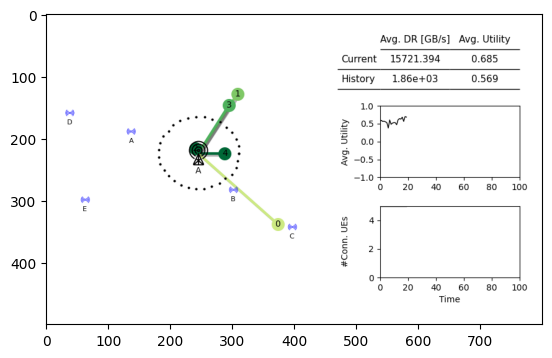

In [6]:
from IPython import display

# run the simulation for 10 time steps
done = False
obs, info = env.reset()
for _ in range(20):
    # here, use random dummy actions by sampling from the action space
    dummy_action = env.action_space.sample()
    obs, reward, terminated, truncated, info = env.step(dummy_action)

    # render the environment
    plt.imshow(env.render())
    display.display(plt.gcf())
    display.clear_output(wait=True)

c:\Users\elifo\AppData\Local\Programs\Python\Python39\lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.plot_queue_sizes to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.plot_queue_sizes` for environment variables or `env.get_wrapper_attr('plot_queue_sizes')` that will search the reminding wrappers.
  logger.warn(


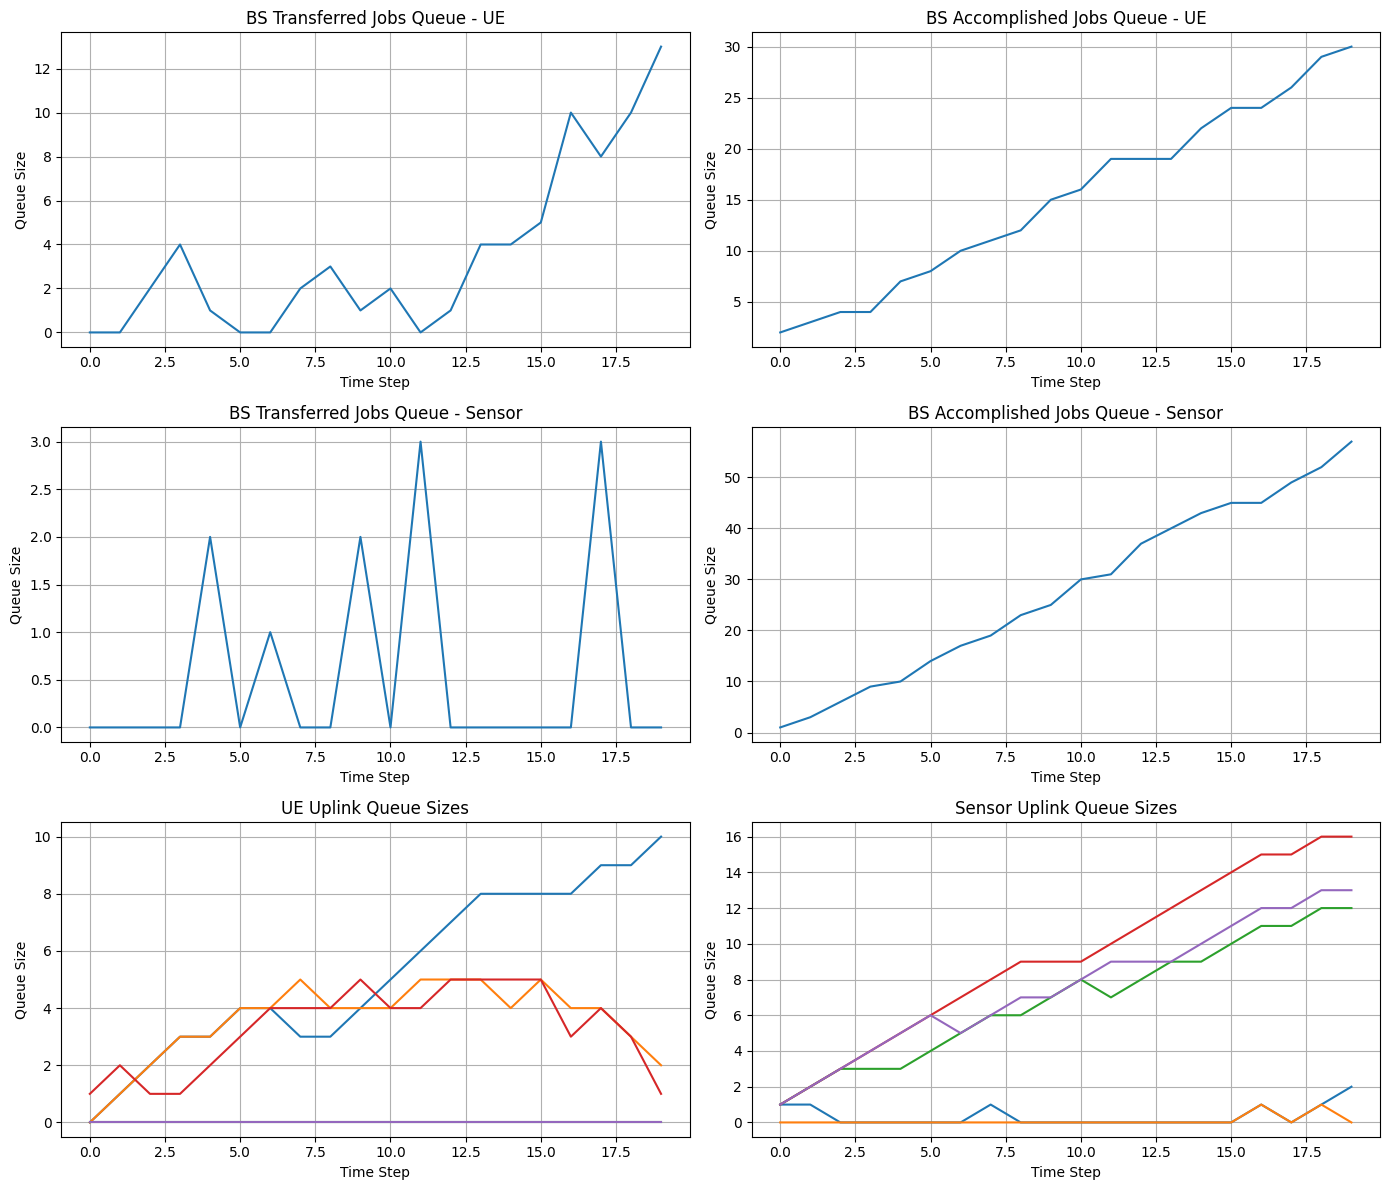

In [7]:
env.plot_queue_sizes()

c:\Users\elifo\AppData\Local\Programs\Python\Python39\lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.plot_dropped_packets to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.plot_dropped_packets` for environment variables or `env.get_wrapper_attr('plot_dropped_packets')` that will search the reminding wrappers.
  logger.warn(


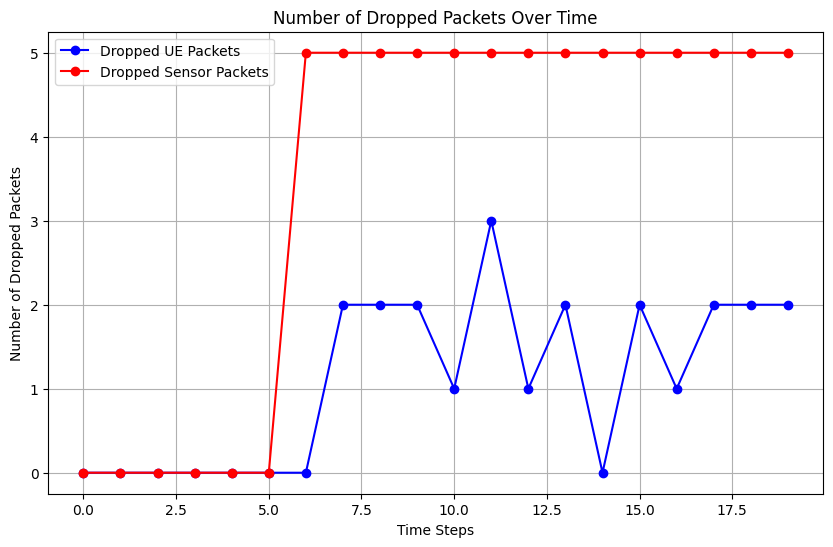

In [8]:
env.plot_dropped_packets()

In [9]:
env.dropped_packet_logs


c:\Users\elifo\AppData\Local\Programs\Python\Python39\lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.dropped_packet_logs to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.dropped_packet_logs` for environment variables or `env.get_wrapper_attr('dropped_packet_logs')` that will search the reminding wrappers.
  logger.warn(


{'time': [0.0,
  1.0,
  2.0,
  3.0,
  4.0,
  5.0,
  6.0,
  7.0,
  8.0,
  9.0,
  10.0,
  11.0,
  12.0,
  13.0,
  14.0,
  15.0,
  16.0,
  17.0,
  18.0,
  19.0],
 'dropped_ue_packets': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  2,
  2,
  2,
  1,
  3,
  1,
  2,
  0,
  2,
  1,
  2,
  2,
  2],
 'dropped_sensor_packets': [0,
  0,
  0,
  0,
  0,
  0,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5]}

c:\Users\elifo\AppData\Local\Programs\Python\Python39\lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.plot_resource_allocations to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.plot_resource_allocations` for environment variables or `env.get_wrapper_attr('plot_resource_allocations')` that will search the reminding wrappers.
  logger.warn(


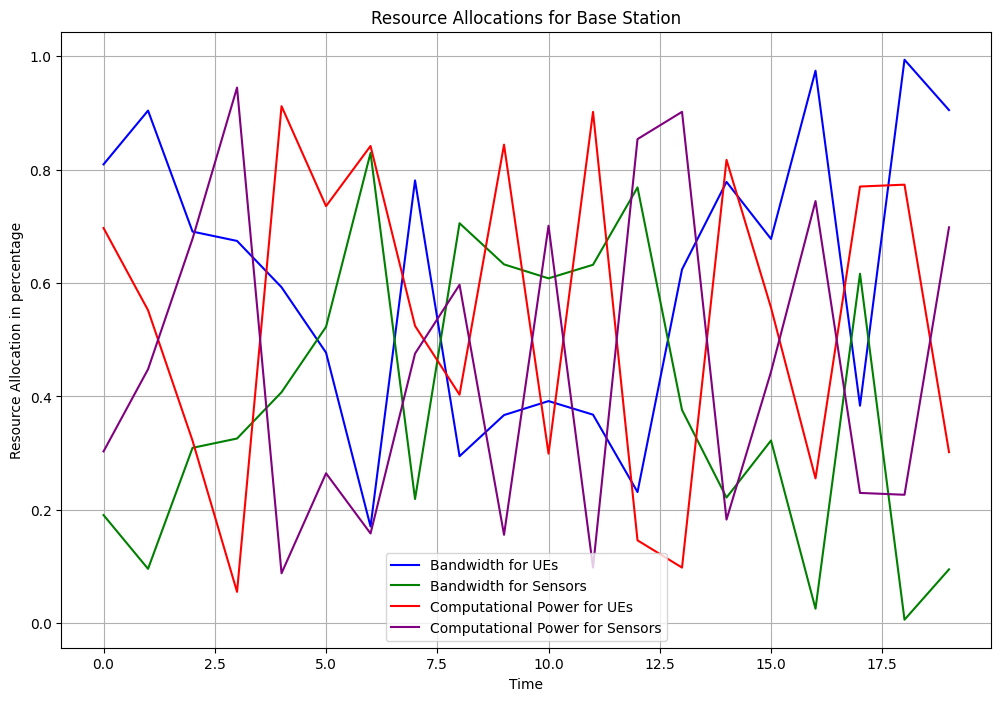

In [10]:
env.plot_resource_allocations()

The rendered environment shows the 6 cells as cell towers with circles indicating their range.
The 15 moving users are shown as small circles, where the number indicates the user ID and
the color represents the user's current QoE (red = bad, yellow = ok, green = good).

A line between a user and a cell indicates that the user is connected to the cell.
Again, the line color indicates the QoE that's achieved via the connection.
Note that users can connect to multiple cells simultaneously using coordinated multipoint (CoMP).

Here, with random action, users sometimes connect to cells but are oftentimes also completely disconnected from any cells, leading to bad QoE (red circles).

New Scenario to check 'f the simulator works properly

from IPython import display
import logging

# Predefined actions for nine episodes
predefined_actions = [
    (0.1, 0.1), 
    (0.2, 0.2), 
    (0.3, 0.3), 
    (0.4, 0.4), 
    (0.5, 0.5), 
    (0.6, 0.6), 
    (0.7, 0.7), 
    (0.8, 0.8), 
    (0.9, 0.9)
]

print(predefined_actions)

# Run the simulation for 50 time steps for 9 episodes
num_episodes = 9
time_steps = 10

for episode in range(num_episodes):
    done = False
    obs, info = env.reset()
    
    # Get the predefined action for this episode
    action = predefined_actions[episode]

    for t in range(time_steps):
        # Use the predefined action for this episode
        obs, reward, terminated, truncated, info = env.step(action)
        
        # Render the environment
        plt.imshow(env.render())
        display.display(plt.gcf())
        display.clear_output(wait=True)
        
        # Check if the episode is done
        if terminated or truncated:
            break

    print(f"Episode {episode + 1}: Action {action} completed.")
    print(f"Reward for episode {episode + 1}: {reward}")